![Title](opening-slide.png)

![xkcd](comic.png)

In [ ]:
# Define random wave generator
import numpy as np

def randwave(std, xmin=0, xmax=10, npts=50):
    np.random.seed(int(100*std)) # Ensure differences between runs
    a = np.cos(np.linspace(xmin, xmax, npts))
    b = np.random.randn(npts)
    return a + b*std

In [ ]:
# Other imports
import time
import concurrent.futures
import pickle
import gzip
import matplotlib.pyplot as plt

# Start timing
start = time.time()

# Calculate output in parallel
with concurrent.futures.ProcessPoolExecutor() as executor:
    waves = list(executor.map(randwave, np.linspace(0, 1, 11)))

# Save to files
filenames = []
for i,wave in enumerate(waves):
    filename = f'wave{i}.obj'
    with gzip.GzipFile(filename, 'wb') as fileobj:
        fileobj.write(pickle.dumps(wave))
    filenames.append(filename)

# Create dict from files
data_dict = {}
for fname in filenames:
    with gzip.GzipFile(fname) as fileobj:
        filestring = fileobj.read()
        data_dict[fname] = pickle.loads(filestring)
data = np.array([data_dict[fname] for fname in filenames])

# Create 3D plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ny, nx = np.array(data).shape
x = np.arange(nx)
y = np.arange(ny)
X, Y = np.meshgrid(x, y)
surf = ax.plot_surface(X, Y, data, cmap='coolwarm')
fig.colorbar(surf)

# Print elapsed time
elapsed = time.time() - start
print(f'Elapsed time: {elapsed} s')

Elapsed time: 0.2550852298736572 s


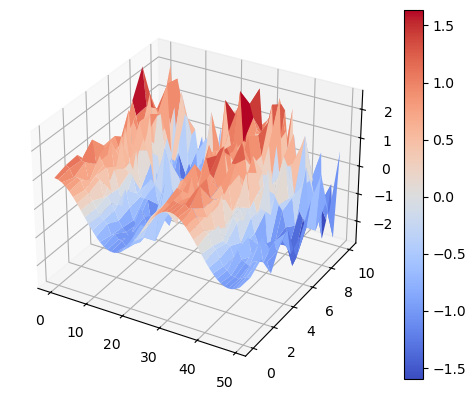

In [48]:
# Other imports
import time
import concurrent.futures
import pickle
import gzip
import matplotlib.pyplot as plt

# Start timing
start = time.time()

# Calculate output in parallel
with concurrent.futures.ProcessPoolExecutor() as executor:
    waves = list(executor.map(randwave, np.linspace(0, 1, 11)))

# Save to files
filenames = []
for i,wave in enumerate(waves):
    filename = f'wave{i}.obj'
    with gzip.GzipFile(filename, 'wb') as fileobj:
        fileobj.write(pickle.dumps(wave))
    filenames.append(filename)

# Create dict from files
data_dict = {}
for fname in filenames:
    with gzip.GzipFile(fname) as fileobj:
        filestring = fileobj.read()
        data_dict[fname] = pickle.loads(filestring)
data = np.array([data_dict[fname] for fname in filenames])

# Create 3D plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ny, nx = np.array(data).shape
x = np.arange(nx)
y = np.arange(ny)
X, Y = np.meshgrid(x, y)
surf = ax.plot_surface(X, Y, data, cmap='coolwarm')
fig.colorbar(surf)

# Print elapsed time
elapsed = time.time() - start
print(f'Elapsed time: {elapsed} s')

In [ ]:
import sciris as sc
T = sc.timer()
waves = sc.parallelize(randwave, np.linspace(0, 1, 11))
filenames = [sc.save(f'wave{i}.obj', wave) for i,wave in enumerate(waves)]
data = sc.odict({fname:sc.load(fname) for fname in filenames})
sc.surf3d(data[:], cmap='orangeblue')
T.toc()